In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

url = 'https://pjreddie.com/media/files/mnist_test.csv'

dataframe = pd.read_csv(url, header=None)

X = dataframe.iloc[:, 1:].values.astype('float32')
y = dataframe.iloc[:, 0].values.astype('int32')

X = np.reshape(X, (X.shape[0], 28, 28, 1))
y = np.reshape(y, (y.shape[0], 1))

X /= 255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train, y_test

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Epoch 1/10
250/250 [==============================] - 27s 79ms/step - loss: 0.4843 - accuracy: 0.8480 - val_loss: 0.1753 - val_accuracy: 0.9385
Epoch 2/10
250/250 [==============================] - 16s 66ms/step - loss: 0.1130 - accuracy: 0.9640 - val_loss: 0.0994 - val_accuracy: 0.9700
Epoch 3/10
250/250 [==============================] - 15s 61ms/step - loss: 0.0661 - accuracy: 0.9787 - val_loss: 0.0742 - val_accuracy: 0.9770
Epoch 4/10
250/250 [==============================] - 11s 44ms/step - loss: 0.0438 - accuracy: 0.9843 - val_loss: 0.0780 - val_accuracy: 0.9750
Epoch 5/10
250/250 [==============================] - 9s 38ms/step - loss: 0.0407 - accuracy: 0.9879 - val_loss: 0.0595 - val_accuracy: 0.9815
Epoch 6/10
250/250 [==============================] - 14s 57ms/step - loss: 0.0206 - accuracy: 0.9931 - val_loss: 0.0681 - val_accuracy: 0.9750
Epoch 7/10
250/250 [==============================] - 13s 54ms/step - loss: 0.0133 - accuracy: 0.9951 - val_loss: 0.0710 - val_accuracy: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Función que recibe una imagen de entrada y un modelo de red convolucional y devuelve las activaciones intermedias
def get_activations(image, model):
  activations = []
  for layer in model.layers:
    # Si la capa es convolucional o de pooling, extraer la salida de la capa
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
      aux_model = keras.Model(inputs=model.input, outputs=layer.output)
      output = aux_model.predict(image)
      activations.append(output)
  return activations

# Función que recibe una lista de activaciones y las grafica en una cuadrícula
def plot_activations(activations, n_min=14):
  plt.figure(figsize=(15, 15))
  for i, activation in enumerate(activations):
    n_filters = activation.shape[-1]
    n_rows = int(np.sqrt(n_filters))
    n_cols = int(np.ceil(n_filters / n_rows))
    # Ordenar los filtros por magnitud
    filters = np.argsort(np.sum(np.abs(activation), axis=(0, 1, 2)))[::-1]
    # Plotear los primeros n_min filtros
    for j in range(min(14, n_filters)):
      plt.subplot(n_rows, n_cols * len(activations), i * n_cols * len(activations) + j + 1)
      plt.imshow(activation[0, :, :, filters[j]], cmap='Reds')
      plt.axis('off')
  plt.show()

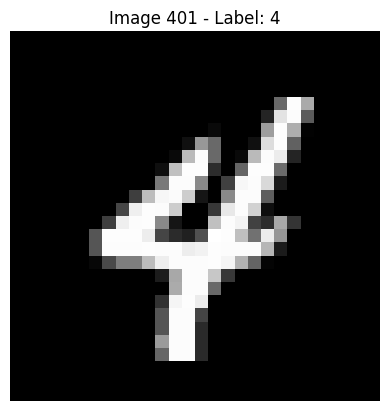

In [ ]:
index = np.random.randint(0, len(X_test))
image = X_test[index].reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.title(f'Image {index} - Label: {y_test[index].argmax()}')
plt.axis('off')
plt.show()

In [ ]:
image.shape

(28, 28)

In [ ]:
# Forzamos que los datos tengan forma (batch_size, height, width, channels)
data = image
data = data.reshape((1, data.shape[0], data.shape[1], 1))

In [ ]:
data.shape

(1, 28, 28, 1)

In [ ]:
activations = get_activations(data, model)

1/1 [==============================] - 0s 65ms/step


In [ ]:
len(activations)

5

In [ ]:
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>

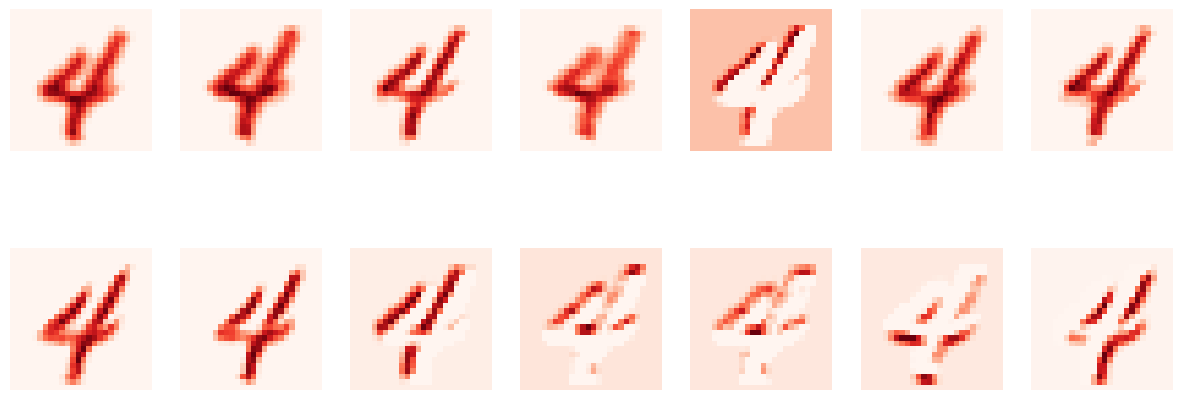

In [ ]:
plot_activations([activations[0]])